In [11]:
# plot imports
import matplotlib
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from skimage.measure import EllipseModel
from mpl_toolkits.axes_grid1 import make_axes_locatable
from lc_tda.plot import rcparams, format_axis, format_axis_im

# sklearn imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix

# other imports
import glob
import pickle
import numpy as np
import porespy as ps
import gstools as gs
from lc_tda.topology import minkowski, fractal_minkowski

# format figures
rcparams(1)

# define color cycle
COLOR = ['#515151', '#df5048', '#3370d8', '#5baa71',
         '#a87bd8', '#c49b33', '#5bc8ca', '#76504f',
         '#8e8c2b', '#ea6f2d', '#7099c8', '#80b537']

# descriptor orders:
# 0: VL, 1: AR, 2: BL, 3: EC, 4: FD, 5: LA

# color orders:
# 0: A*, 1: B*, 2: blue, 3: gray, 4: green, 5: L*, 6: red


### 1. Box-counting Method

Corresponding to Figure S4, S5.


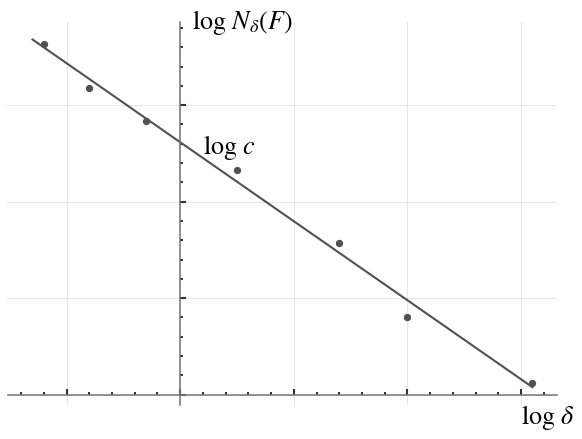

In [5]:
x = np.array([-1.2, -0.8, -0.3, 0.5, 1.4, 2.0, 3.1])
y = x * -0.8 + 2.5
y += np.random.RandomState(0).randn(len(x)) * 0.1
a, b = np.polyfit(x, y, deg=1)
xx = np.arange(-1.3, 3.2, 0.1)
yy = a * xx + b

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y)
ax.plot(xx, yy)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(0.2, 2.5, 'log $c$', fontsize=25)
ax.text(0.1, 3.8, 'log $N_{\delta}(F)$', fontsize=25)
ax.text(3, -0.3, 'log $\delta$', fontsize=25)

format_axis(ax)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# remove the ticks from the top and right edges
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()

plt.savefig('../image/si/log_log.png', dpi=300,
            bbox_inches='tight', transparent=True)


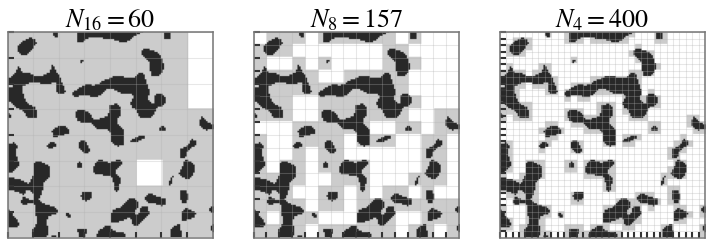

In [8]:
np.random.seed(0)
im = ps.generators.blobs(shape=[128, 128], porosity=0.2)
im = im.astype('int')

def box_count(window):
    box = np.zeros_like(im)
    count = 0
    for i in np.arange(0, 128, window):
        for j in np.arange(0, 128, window):
            if im[i:i+window, j:j+window].sum() != 0:
                count += 1
                box[i:i+window, j:j+window] = 1
    return box, count

windows = [16, 8, 4]
fig, ax = plt.subplots(figsize=(12, 4), ncols=3)
for i in range(3):
    box, count = box_count(windows[i])
    ax[i].imshow(im, cmap='gray_r', alpha=0.8)
    ax[i].imshow(box, cmap='gray_r', alpha=0.2)
    ax[i].set_xticks(np.arange(0, 128, windows[i])-0.5)
    ax[i].set_yticks(np.arange(0, 128, windows[i])-0.5)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

    ax[i].set_title(f'$N_{{{windows[i]}}}={count}$', fontsize=25)
    format_axis_im(ax[i])

plt.savefig('../image/si/box_count.png', dpi=300,
            bbox_inches='tight', transparent=True)

### 2. Topological Descriptors
Corresponding to Figure S6 and S7.

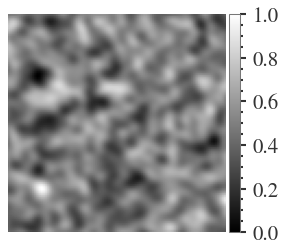

In [12]:
x = y = range(100)
ls = np.linspace(-4, 4, 10)
lams = [4]
field = []
for i in lams:
    model = gs.Gaussian(dim=2, var=2, len_scale=i)
    srf = gs.SRF(model, seed=177)
    f = srf((x, y), mesh_type='structured')
    f = f - f.min()
    f = f / f.max()
    field.append(f)
field = np.array(field).squeeze()

fig, ax = plt.subplots(figsize=(4,4))

im = ax.imshow(field, cmap='gray', vmin=0, vmax=1)
ax.grid()
ax.axis('off')

divider = make_axes_locatable(ax)
matplotlib.rcParams['ytick.direction'] = 'out'
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
format_axis(cax)


plt.savefig('../image/si/example_gray.png', dpi=300,
            bbox_inches='tight', transparent=True)


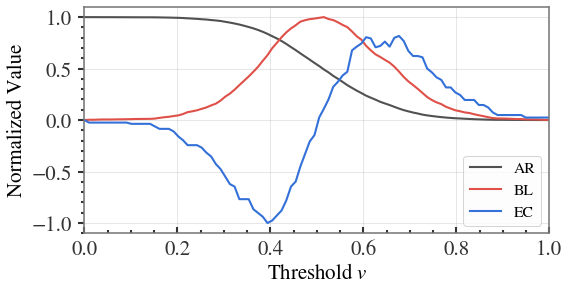

In [13]:
t = np.linspace(0, 1, 100)
mk = minkowski(field, t)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(t, mk[:, 0] / np.abs(mk[:, 0]).max(), label='AR')
ax.plot(t, mk[:, 1] / np.abs(mk[:, 1]).max(), label='BL')
ax.plot(t, mk[:, 2] / np.abs(mk[:, 2]).max(), label='EC')
ax.set_xlim([0, 1])
ax.legend(loc=4)
ax.set_xlabel('Threshold $v$')
ax.set_ylabel('Normalized Value')
format_axis(ax)

plt.savefig('../image/si/example_mink.png', dpi=300,
            bbox_inches='tight', transparent=True)

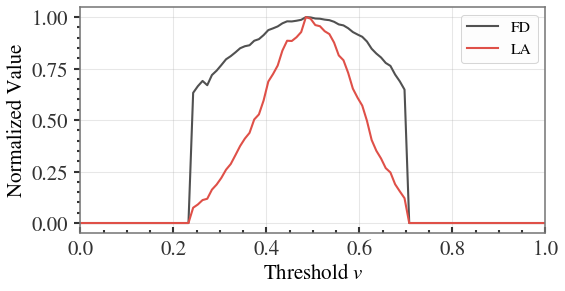

In [14]:
t = np.linspace(0, 1, 100)
fd = fractal_minkowski(field, t)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(t, fd[:, 0] / np.abs(fd[:, 0]).max(), label='FD')
ax.plot(t, fd[:, 1] / np.abs(fd[:, 1]).max(), label='LA')
ax.set_xlim([0, 1])
ax.legend(loc=1)
ax.set_xlabel('Threshold $v$')
ax.set_ylabel('Normalized Value')
format_axis(ax)

plt.savefig('../image/si/example_fd.png', dpi=300,
            bbox_inches='tight', transparent=True)